In [138]:
import numpy as np
from keras.layers import Dense, Input, Lambda, BatchNormalization 
from keras.models import Model
from keras.optimizers import adadelta, adam 
from keras.regularizers import l1
import pydot
import matplotlib.pyplot as plt 
import keras.backend as K
from keras.losses import binary_crossentropy

In [139]:

def build_discrm(input_size):
    
    x_in=Input(shape=(input_size, ))
    X=Dense(512,activation='relu')(x_in)
    X=Dense(256,activation='relu')(X)
    y=Dense(1,activation='sigmoid')(X)
    
    
    discriminator = Model(inputs=x_in, outputs = y) 
    
    discriminator.compile(optimizer='adam',loss='binary_crossentropy')
    
    return discriminator
    

discriminator= build_discrm(input_size=784)

In [140]:
discriminator.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_27 (InputLayer)        (None, 784)               0         
_________________________________________________________________
dense_44 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_45 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_46 (Dense)             (None, 1)                 257       
Total params: 533,505
Trainable params: 533,505
Non-trainable params: 0
_________________________________________________________________


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_23 (InputLayer)        (None, 784)               0         
_________________________________________________________________
dense_35 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_36 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_37 (Dense)             (None, 1)                 257       
Total params: 533,505
Trainable params: 131,585
Non-trainable params: 401,920
_________________________________________________________________


In [141]:
def build_gen(embed_size):
    
    x_in = Input(shape=(embed_size,))
    X=Dense(128,activation='relu')(x_in)
    X=Dense(256,activation='relu')(X)
    Y=Dense(784,activation='sigmoid')(X)
    generator= Model(inputs=x_in,outputs= Y)
    generator.compile(optimizer='adam',loss='binary_crossentropy')
    return generator

generator=build_gen(embed_size=128)

In [142]:
generator.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_28 (InputLayer)        (None, 128)               0         
_________________________________________________________________
dense_47 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_48 (Dense)             (None, 256)               33024     
_________________________________________________________________
dense_49 (Dense)             (None, 784)               201488    
Total params: 251,024
Trainable params: 251,024
Non-trainable params: 0
_________________________________________________________________


In [143]:
def build_adversarial(input_size,embed_size,generator, discriminator):
    
    
    z_in= Input(shape=(embed_size,))
    x_gen = generator(z_in) 
    #discriminator.trainable= False    # only generator
    #discriminator.compile(loss='binary_crossentropy',optimizer='adam')
    y = discriminator(x_gen)
    adversarial = Model(inputs = z_in ,outputs = y)
    adversarial.compile(optimizer='adam', loss = 'binary_crossentropy')
    return adversarial


adversarial = build_adversarial(input_size=784,embed_size=128,generator=generator, discriminator=discriminator)


In [144]:
adversarial.layers[2]

In [145]:
discriminator.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_27 (InputLayer)        (None, 784)               0         
_________________________________________________________________
dense_44 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_45 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_46 (Dense)             (None, 1)                 257       
Total params: 533,505
Trainable params: 533,505
Non-trainable params: 0
_________________________________________________________________


In [31]:
def sample_images(self, epoch):
        r, c = 5, 5
        noise = np.random.normal(0, 1, (r * c, self.latent_dim))
        gen_imgs = self.generator.predict(noise)

        # Rescale images 0 - 1
        gen_imgs = 0.5 * gen_imgs + 0.5

        fig, axs = plt.subplots(r, c)
        cnt = 0
        for i in range(r):
            for j in range(c):
                axs[i,j].imshow(gen_imgs[cnt, :,:,0], cmap='gray')
                axs[i,j].axis('off')
                cnt += 1
        fig.savefig("images/%d.png" % epoch)
        plt.close()








def model_train(x_train,x_test,batch_size,embed_size,epochs,sample_interval,generator,discriminator,adversarial):
    
    real = np.ones((batch_size, 1))
    fake = np.zeros((batch_size, 1))
    
    for epoch in range(epochs):
        
        idx = np.random.randint(0, X_train.shape[0], batch_size)
        imgs = X_train[idx]
        noise = np.random.normal(0, 1, (batch_size, embed_size))
        
        gen_imgs= generator.predict(noise)

        real_image_loss =discriminator.train_on_batch(x=imgs, y= real)
        fake_image_loss = discriminator.train_on_batch(x=gen_imgs, y = fake)
        
        total_loss = 0.5 *np.add(real_image_loss ,fake_image_loss)
        
        
        noise = np.random.normal(0, 1, (batch_size, embed_size))
        
        gen_loss = adversarial.train_on_batch(x= noise , y = real)
        
        print ("%d [D loss: %f] [G loss: %f]" % (epoch, d_loss, g_loss))
        
        
        
        
        
        
        
        
    
    
    
    
    
    

In [146]:
from keras.datasets import mnist

(X_train, _), (X_test, _) = mnist.load_data()

In [147]:
X_train=X_train/255
X_test=X_test/255

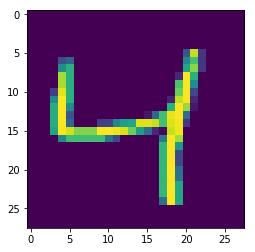

In [148]:
plt.imshow(X_train[2])

In [101]:
X_test.shape

(10000, 28, 28)

In [149]:
X_train = X_train.reshape(X_train.shape[0],np.prod(X_train.shape[1:]))
X_test = X_test.reshape(X_test.shape[0],np.prod(X_test.shape[1:]))

In [150]:
X_test.shape

(10000, 784)

In [151]:
discriminator.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_27 (InputLayer)        (None, 784)               0         
_________________________________________________________________
dense_44 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_45 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_46 (Dense)             (None, 1)                 257       
Total params: 533,505
Trainable params: 533,505
Non-trainable params: 0
_________________________________________________________________


In [152]:
adversarial.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_29 (InputLayer)        (None, 128)               0         
_________________________________________________________________
model_23 (Model)             (None, 784)               251024    
_________________________________________________________________
model_22 (Model)             (None, 1)                 533505    
Total params: 784,529
Trainable params: 784,529
Non-trainable params: 0
_________________________________________________________________


0 [D loss: 7.971192] [G loss: 0.000000]


IndexError: too many indices for array

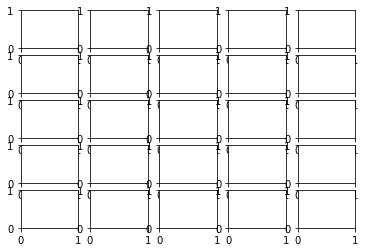

In [157]:


batch_size=256
embed_size=128
epochs = 20

def sample_images(epoch):
        r, c = 5, 5
        noise = np.random.normal(0, 1, (r * c, embed_size))
        gen_imgs = generator.predict(noise)

        # Rescale images 0 - 1
        #gen_imgs = 0.5 * gen_imgs + 0.5

        fig, axs = plt.subplots(r, c)
        cnt = 0
        for i in range(r):
            for j in range(c):
                axs[i,j].imshow(gen_imgs[cnt, :,:,0], cmap='gray')
                axs[i,j].axis('off')
                cnt += 1
        fig.savefig("images/%d.png" % epoch)
        plt.close()



for epoch in range(epochs):
        real = np.ones((batch_size, 1))
        fake = np.zeros((batch_size, 1))
        idx = np.random.randint(0, X_train.shape[0], batch_size)
        imgs = X_train[idx]
        noise = np.random.normal(0, 1, (batch_size, embed_size))
        gen_imgs= generator.predict(noise)
        discriminator.trainable=True
        discriminator.compile(optimizer='adam',loss='binary_crossentropy')
        real_image_loss =discriminator.train_on_batch(x=imgs, y= real)
        fake_image_loss = discriminator.train_on_batch(x=gen_imgs, y = fake)
        total_loss = 0.5 *np.add(real_image_loss ,fake_image_loss)
        noise = np.random.normal(0, 1, (batch_size, embed_size))
        discriminator.trainable=False
        discriminator.compile(optimizer='adam',loss='binary_crossentropy')
        gen_loss = adversarial.train_on_batch(x= noise , y = real)
        print ("%d [D loss: %f] [G loss: %f]" % (epoch, total_loss, gen_loss))
        sample_images(epoch)
        

In [109]:
gen_imgs=generator.predict(noise)

In [110]:
gen_imgs.shape

(256, 784)

In [111]:
discriminator.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_24 (InputLayer)        (None, 784)               0         
_________________________________________________________________
dense_38 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_39 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_40 (Dense)             (None, 1)                 257       
Total params: 533,505
Trainable params: 533,505
Non-trainable params: 0
_________________________________________________________________


In [112]:
real.shape

(256, 1)

In [113]:
real_image_loss =discriminator.train_on_batch(x=imgs, y= real)

In [114]:
real_image_loss


0.55012965

In [115]:
fake_image_loss = discriminator.train_on_batch(x=gen_imgs, y = fake)

In [116]:
fake_image_loss


4.6773343

In [117]:
adversarial.layers[2].trainable=False
adversarial.compile(optimizer='adam',loss='binary_crossentropy')

In [118]:
adversarial.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_26 (InputLayer)        (None, 128)               0         
_________________________________________________________________
model_20 (Model)             (None, 784)               251024    
_________________________________________________________________
model_19 (Model)             (None, 1)                 533505    
Total params: 784,529
Trainable params: 251,024
Non-trainable params: 533,505
_________________________________________________________________


In [119]:
discriminator.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_24 (InputLayer)        (None, 784)               0         
_________________________________________________________________
dense_38 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_39 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_40 (Dense)             (None, 1)                 257       
Total params: 1,067,010
Trainable params: 533,505
Non-trainable params: 533,505
_________________________________________________________________


In [123]:
discriminator.trainable=False

In [124]:
discriminator.compile(optimizer='adam',loss='binary_crossentropy')

In [125]:
discriminator.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_24 (InputLayer)        (None, 784)               0         
_________________________________________________________________
dense_38 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_39 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_40 (Dense)             (None, 1)                 257       
Total params: 533,505
Trainable params: 0
Non-trainable params: 533,505
_________________________________________________________________


In [126]:
adversarial.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_26 (InputLayer)        (None, 128)               0         
_________________________________________________________________
model_20 (Model)             (None, 784)               251024    
_________________________________________________________________
model_19 (Model)             (None, 1)                 533505    
Total params: 784,529
Trainable params: 251,024
Non-trainable params: 533,505
_________________________________________________________________


In [127]:
discriminator.trainable=False
discriminator.compile(optimizer='adam',loss='binary_crossentropy')


In [128]:
adversarial.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_26 (InputLayer)        (None, 128)               0         
_________________________________________________________________
model_20 (Model)             (None, 784)               251024    
_________________________________________________________________
model_19 (Model)             (None, 1)                 533505    
Total params: 784,529
Trainable params: 251,024
Non-trainable params: 533,505
_________________________________________________________________


In [129]:
noise = np.random.normal(0, 1, (batch_size, embed_size))


In [130]:
nosie.shpae

NameError: name 'nosie' is not defined

In [131]:
noise.shape

(256, 128)

In [132]:
gen_loss = adversarial.train_on_batch(x= noise , y = real)

In [133]:
gen_loss

0.18289107

In [135]:
X_train.shape

(60000, 784)

In [137]:
np.min(X_train[0])

0.0